# Explonatory Data Analisys - Call Center Performance
# Álvaro Sánchez Martín

In [1]:
#Importaciones
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as numpy
import pandas as pd
import seaborn as sns

In [2]:
# Colores personalizados para las gráficas
colors = ["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe", "#ffc9e0", "#ffffff"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d9f1cf", "#c1c5ef"])

## 1-Entendimiento de los datos

In [3]:
#Carga del dataset
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/EDA_Entrega/src/data/Call Center.csv")

#Visualización del dataset
df

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/05/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/04/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA
...,...,...,...,...,...,...,...,...,...,...,...,...
32936,BRM-96715111-h-155613-wO,Othelia Ouldcott,Neutral,NaN,10/30/2020,Billing Question,Oklahoma City,Oklahoma,Web,Within SLA,13,Denver/CO
32937,UJH-96531654-y-074703-H4,Tasha Cubbinelli,Negative,NaN,10/07/2020,Billing Question,Crawfordsville,Indiana,Chatbot,Within SLA,42,Baltimore/MD
32938,WDS-58440679-I-064360-TT,Margaux Slaten,Negative,NaN,10/04/2020,Billing Question,Lehigh Acres,Florida,Chatbot,Within SLA,30,Baltimore/MD
32939,FTZ-87704815-T-824288-iC,Odey Seed,Positive,8.0,10/27/2020,Payments,Salt Lake City,Utah,Call-Center,Within SLA,38,Baltimore/MD


In [4]:
#Exploración de las columnas y de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32941 non-null  object 
 1   customer_name             32941 non-null  object 
 2   sentiment                 32941 non-null  object 
 3   csat_score                12271 non-null  float64
 4   call_timestamp            32941 non-null  object 
 5   reason                    32941 non-null  object 
 6   city                      32941 non-null  object 
 7   state                     32941 non-null  object 
 8   channel                   32941 non-null  object 
 9   response_time             32941 non-null  object 
 10  call duration in minutes  32941 non-null  int64  
 11  call_center               32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

id                              0
customer_name                   0
sentiment                       0
csat_score                  20670
call_timestamp                  0
reason                          0
city                            0
state                           0
channel                         0
response_time                   0
call duration in minutes        0
call_center                     0
dtype: int64

# Tabla de Variables

| Variable                  | Tipo de Dato   | Descripción                                                                 |
|---------------------------|----------------|-----------------------------------------------------------------------------|
| `id`                     | String         | Identificador único del contacto.                                            |
| `customer_name`          | String         | Nombre del cliente que realizó el contacto.                                  |
| `sentiment`              | Categórico     | Sentimiento del cliente hacia el servicio (`Very Positive`,`Negative`,etc ). |
| `csat_score`             | Numérico       | Puntuación de la satisfacción del cliente (1-10).                            |
| `call_timestamp`         | Fecha/Datetime | Fecha en la que se realizó el contacto.                                      |
| `reason`                 | Categórico     | Razón del contacto (`Billing Question`, `Payments`, etc.).                |
| `city`                   | String         | Ciudad desde donde llamó el cliente.                                       |
| `state`                  | String         | Estado desde donde llamó el cliente.                                       |
| `channel`                | Categórico     | Canal utilizado para el contacto (`Call-Center`, `Chatbot`, etc.).          |
| `response_time`          | Categórico     | Tiempo de respuesta (`Within SLA`, `Above SLA`).                           |
| `call duration in minutes` | Numérico       | Duración de la llamada en minutos.                                         |
| `call_center`            | String         | Centro de llamadas que gestionó el contacto.                                |

***Se observa que solo hay nulos en la columna "csat_score" lo cual es lógico ya que no todos los clientes tienden a valorar el contacto.***
***Aún así, disponemos de la columna "sentiment" que está relacionada con la satisfacción del cliente, por lo que la usaremos para rellenar la columna de CSAT con la media de los valores de "sentiment".***

# LIMPIEZA DE DATOS

In [6]:
#Conversión a formato datetime de la columna "call_timestamp"
df["call_timestamp"] = pd.to_datetime(df["call_timestamp"], format="%m/%d/%Y")
df = df.sort_values(by="call_timestamp")

# Obtener la fecha más antigua y la fecha más reciente
fecha_mas_antigua = df["call_timestamp"].min()
fecha_mas_nueva = df["call_timestamp"].max()

print("Fecha más antigua:", fecha_mas_antigua)
print("Fecha más reciente:", fecha_mas_nueva)


Fecha más antigua: 2020-10-01 00:00:00
Fecha más reciente: 2020-10-31 00:00:00


In [7]:
#Eliminación la columna "id" ya que para este análisis no es necesaria
df = df.drop(columns = "id")

In [8]:
#Agrupación de los valores de "sentiment" en categorías más generales
sentiment_map = {
    "Very Negative": "Negativa",
    "Negative": "Negativa",
    "Neutral": "Neutral",
    "Positive": "Positiva",
    "Very Positive": "Positiva"
}
df["general_sentiment"] = df["sentiment"].map(sentiment_map)

#Orden lógico de "sentiment"
sentiment_order = ["Negativa", "Neutral", "Positiva"]
df["general_sentiment"] = pd.Categorical(df["general_sentiment"], categories=sentiment_order, ordered=True)

# ANÁLISIS
## Análisis univariante

In [9]:
columnas = ["reason","channel", "call_center"]

for columna in columnas:
    print(f"\nFrecuencias para la columna '{columna}':")
    
    # Frecuencia absoluta
    frecuencia_absoluta = df[columna].value_counts()
    print("Frecuencia Absoluta:")
    print(frecuencia_absoluta)
    
    # Frecuencia relativa
    frecuencia_relativa = df[columna].value_counts(normalize=True) * 100
    print("\nFrecuencia Relativa (%):")
    print(frecuencia_relativa)


Frecuencias para la columna 'reason':
Frecuencia Absoluta:
reason
Billing Question    23462
Payments             4749
Service Outage       4730
Name: count, dtype: int64

Frecuencia Relativa (%):
reason
Billing Question    71.224310
Payments            14.416684
Service Outage      14.359005
Name: proportion, dtype: float64

Frecuencias para la columna 'channel':
Frecuencia Absoluta:
channel
Call-Center    10639
Chatbot         8256
Email           7470
Web             6576
Name: count, dtype: int64

Frecuencia Relativa (%):
channel
Call-Center    32.297137
Chatbot        25.062991
Email          22.676907
Web            19.962964
Name: proportion, dtype: float64

Frecuencias para la columna 'call_center':
Frecuencia Absoluta:
call_center
Los Angeles/CA    13734
Baltimore/MD      11012
Chicago/IL         5419
Denver/CO          2776
Name: count, dtype: int64

Frecuencia Relativa (%):
call_center
Los Angeles/CA    41.692723
Baltimore/MD      33.429465
Chicago/IL        16.450624
Denver

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_29894/2775030122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe"],edgecolor="black")


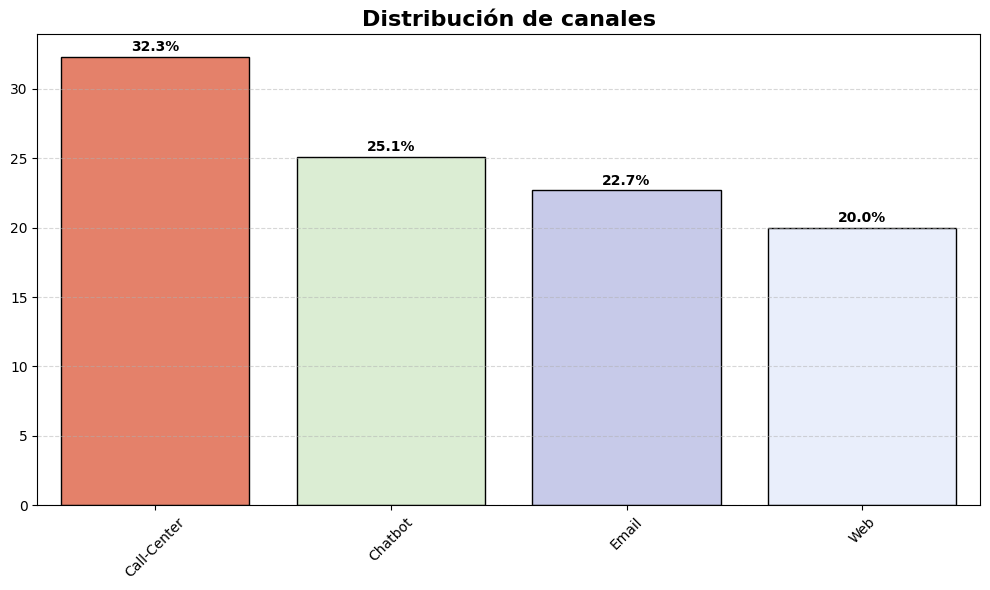

In [19]:
# Calculo de la frecuencia relativa (porcentajes) de cada canal
channel_counts = df["channel"].value_counts(normalize=True) * 100

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette=["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe"],edgecolor="black")

# Personalización del gráfico
plt.title("Distribución de canales", fontsize=16, weight="bold")
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.grid(axis="y", linestyle="--", alpha=0.5)

#Porcentajes encima de las barras
for i, value in enumerate(channel_counts.values):
    plt.text(i, value + 0.2, f"{value:.1f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.savefig("distribucion_canales_porcentajes.png", dpi=300, bbox_inches="tight")  # Guarda la gráfica como PNG

plt.show()


*El motivo más común de contacto es Billing Question, representando más del 70% de los casos.*
Esto indica que una gran parte de los clientes tienen dudas o problemas relacionados con facturación.


Los motivos relacionados con Payments e Service Outage están casi igualados, aunque representan un porcentaje mucho menor (~14% cada uno).


*El canal más utilizado es el Call-Center (32.30%), seguido por Chatbot (25.06%).* 
Esto refleja que los clientes aún prefieren interactuar con agentes humanos, aunque los canales digitales están ganando relevancia.


Los canales Email y Web tienen una participación más baja pero aún significativa, mostrando que una proporción considerable de clientes opta por métodos asincrónicos para comunicarse.


*El centro de llamadas de Los Angeles/CA maneja el mayor volumen de contactos (41.69%), seguido de Baltimore/MD (33.43%).*
Esto sugiere que estos centros tienen mayor capacidad o reciben mayor carga de trabajo.

# ANÁLISIS BIVARIANTE

### "channel" vs. "call_center"

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_29894/3380630794.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = volumen_totales[i // len(volumen_contactos.columns)]


<Figure size 1200x800 with 0 Axes>

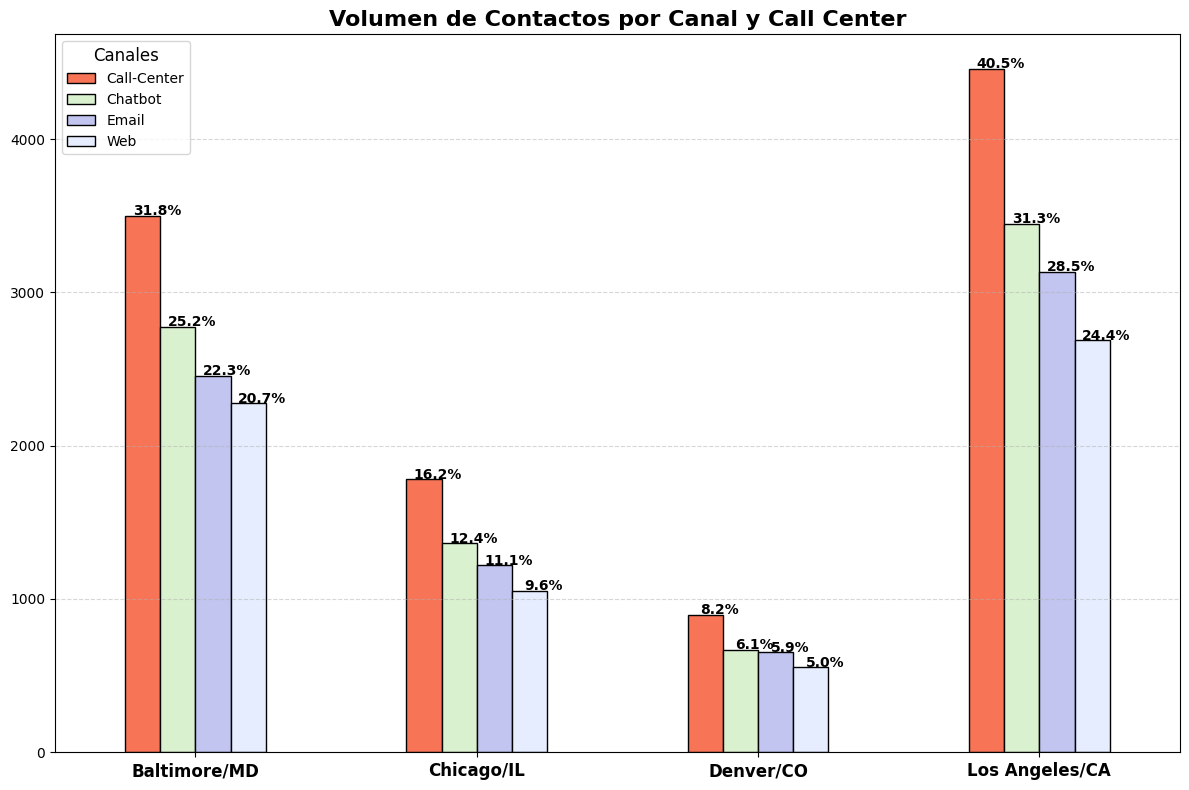

In [11]:
# Crear una tabla de frecuencias por Call Center y Canal
volumen_contactos = pd.crosstab(df["call_center"], df["channel"])
volumen_totales = volumen_contactos.sum(axis=1)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
ax = volumen_contactos.plot(
    kind="bar",
    figsize=(12, 8),
    color=["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe"],
    edgecolor="black"
)

# Personalización del gráfico
plt.title("Volumen de Contactos por Canal y Call Center", fontsize=16, weight="bold")
plt.xticks(rotation=0, fontsize=12, weight="bold")  # Mostrar nombres de los Call Centers
plt.xlabel("")  # Ocultar el título del eje X
plt.ylabel("")  # Ocultar el título del eje Y
plt.legend(title="Canales", fontsize=10, title_fontsize=12, loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar los porcentajes ligeramente desplazados hacia la derecha
for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()  # Altura de la barra
        if height > 0:
            # Calcular el porcentaje
            total = volumen_totales[i // len(volumen_contactos.columns)]
            percentage = (height / total) * 100
            # Posicionar el texto ligeramente a la derecha y un poco más grande
            ax.text(
                bar.get_x() + bar.get_width() / 2 + 0.05,  # Desplazar a la derecha
                height + 2,  # Posicionar justo encima de la barra
                f"{percentage:.1f}%",  # Formato de porcentaje
                ha="center",  # Alineación horizontal
                fontsize=10,  # Tamaño más grande
                weight="bold"  # Negrita
            )

# Guardar la gráfica
plt.tight_layout()
plt.savefig("volumen_contactos.png", dpi=300, bbox_inches="tight")  # Guarda la gráfica como PNG

# Mostrar el gráfico
plt.show()


### "reason" vs. "sentiment"

<Figure size 1200x600 with 0 Axes>

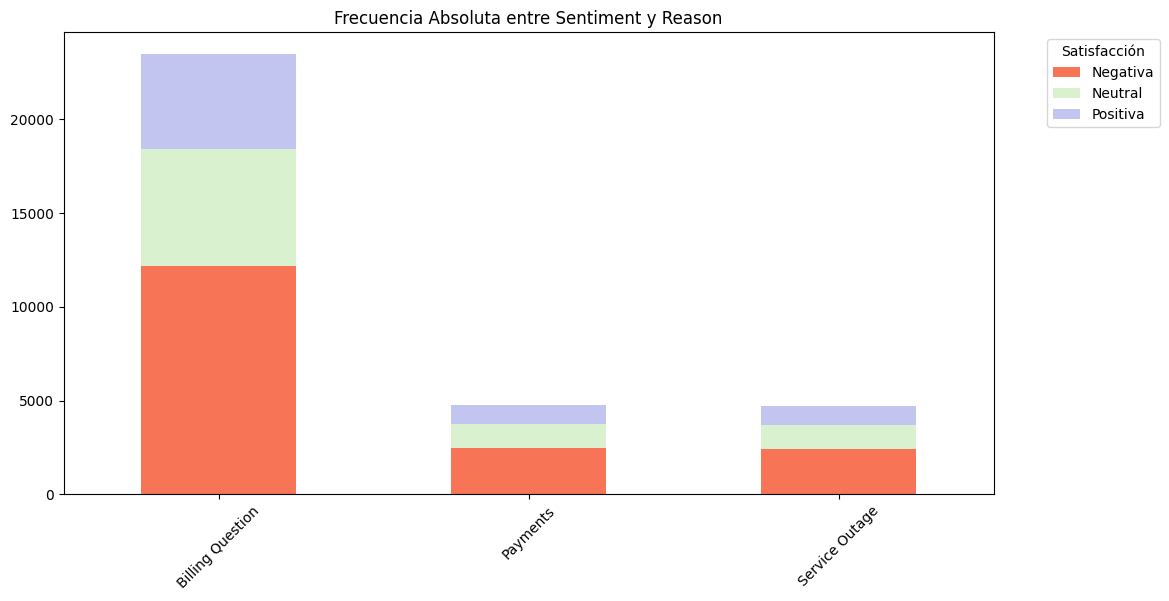

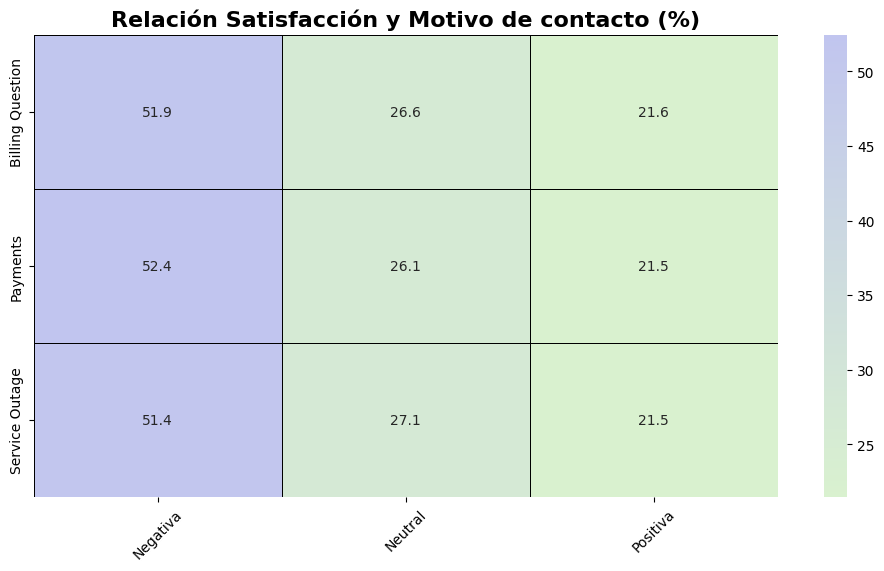

In [18]:
sentiment_reason_absolute = pd.crosstab(df["reason"], df["general_sentiment"])
sentiment_reason_relative = pd.crosstab(df["reason"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_reason_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_reason_absolute.columns)])
plt.title("Frecuencia Absoluta entre Sentiment y Reason")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.legend(title="Satisfacción", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas con líneas de separación
plt.figure(figsize=(12, 6))
sns.heatmap(
    sentiment_reason_relative[sentiment_order],
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,
    cbar=True,
    linewidths=0.5,  # Ancho de las líneas
    linecolor="black"  # Color de las líneas
)
plt.title("Relación Satisfacción y Motivo de contacto (%)", fontsize=16, weight="bold")
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.savefig("relación_satisfacccion_contacto.png", dpi=300, bbox_inches="tight")  # Guarda la gráfica como PNG

plt.show()


#### Conclusión:
Las razones como "Payments" tienen mayores valores negativos, mientras que "Billing questions" está asociado con valoraciones positivas.

### "sentiment" vs. "channel"

<Figure size 1200x600 with 0 Axes>

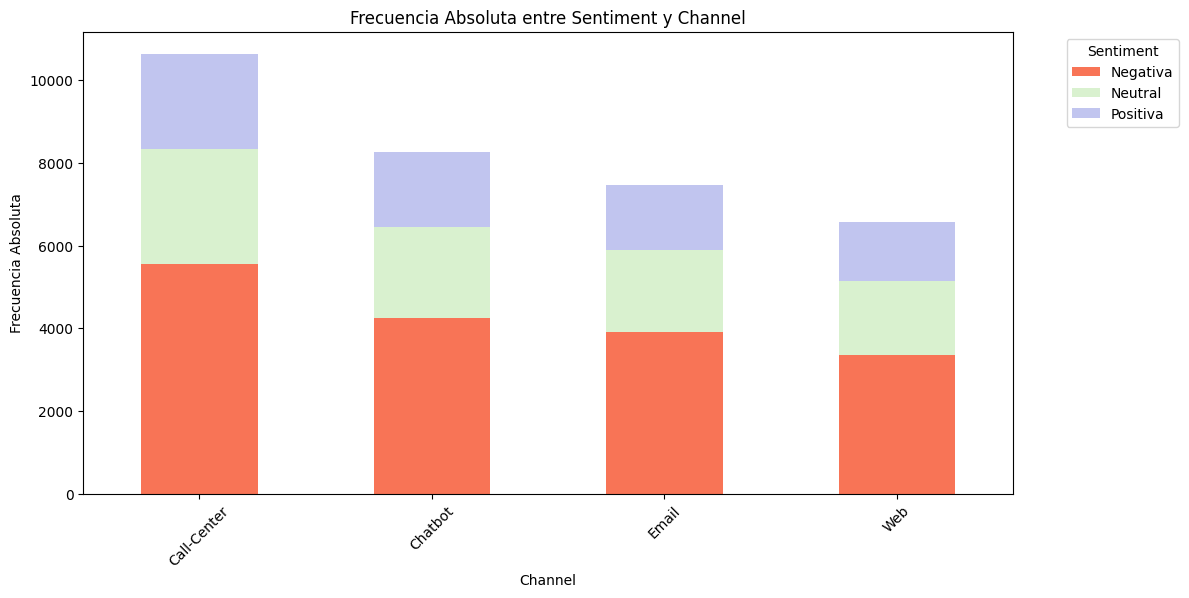

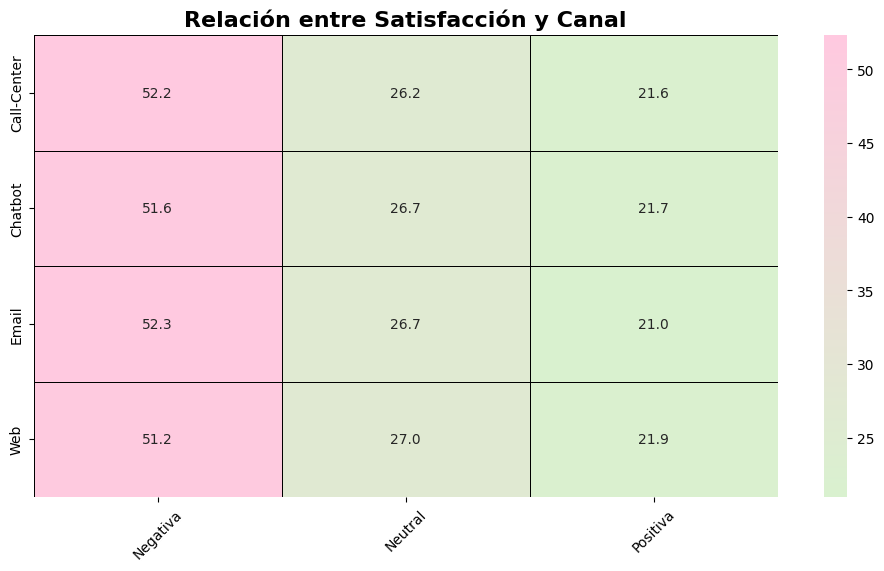

In [13]:
sentiment_channel_absolute = pd.crosstab(df["channel"], df["general_sentiment"])
sentiment_channel_relative = pd.crosstab(df["channel"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_channel_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Channel")
plt.xlabel("Channel")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
custom_cmap2 = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#d9f1cf", "#ffc9e0"]) #Mapa de colores personalizado para diferenciar gráficos en presentación

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_channel_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap2, cbar=True, linewidths=0.5, linecolor="black")
plt.title("Relación entre Satisfacción y Canal",fontsize=16, weight="bold")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

plt.savefig("relación_canal_satisfacción.png", dpi=300, bbox_inches="tight")  # Guarda la gráfica como PNG

plt.show()

#### Conclusión:
 El canal "Email" y "Call-Center" tienen mayor proporción de valoraciones negativas, mientras que "Web" y "Chatbot" tienen más positivas.


 Lo cual nos da una idea de que los clientes están sintiendo frustación con los agentes, lo cual indica que puede que haya un problema de training y conocimiento en estos.


 También nos puede dar una idea de que la automatización de respuestas está siendo muy bien recibida por los clientes.

### "sentiment" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

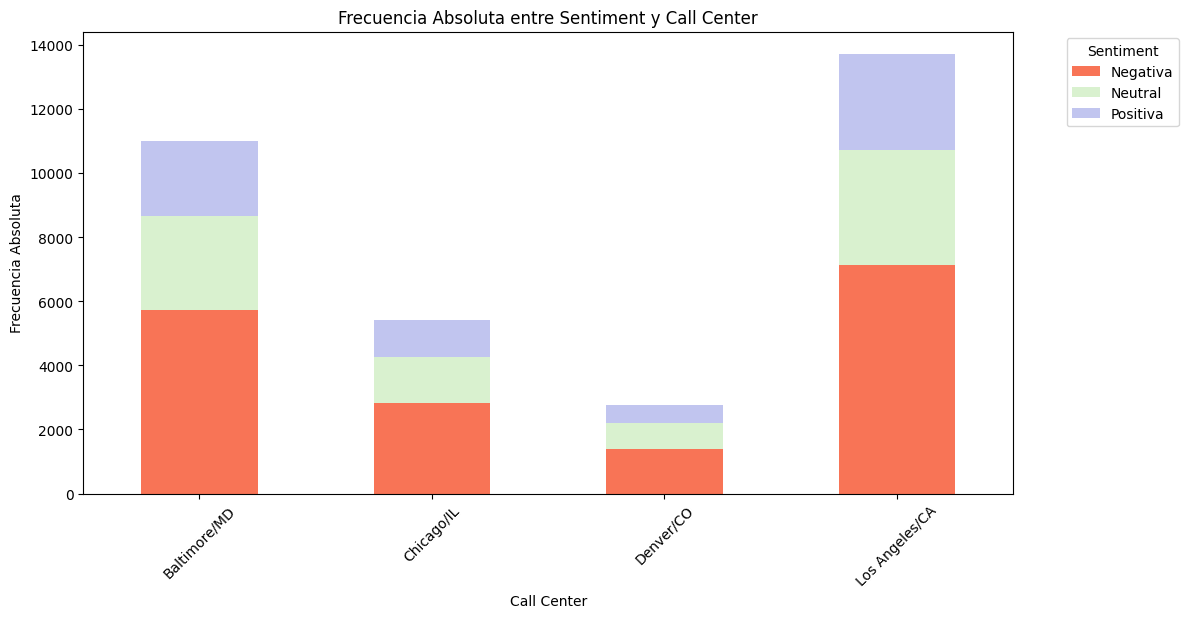

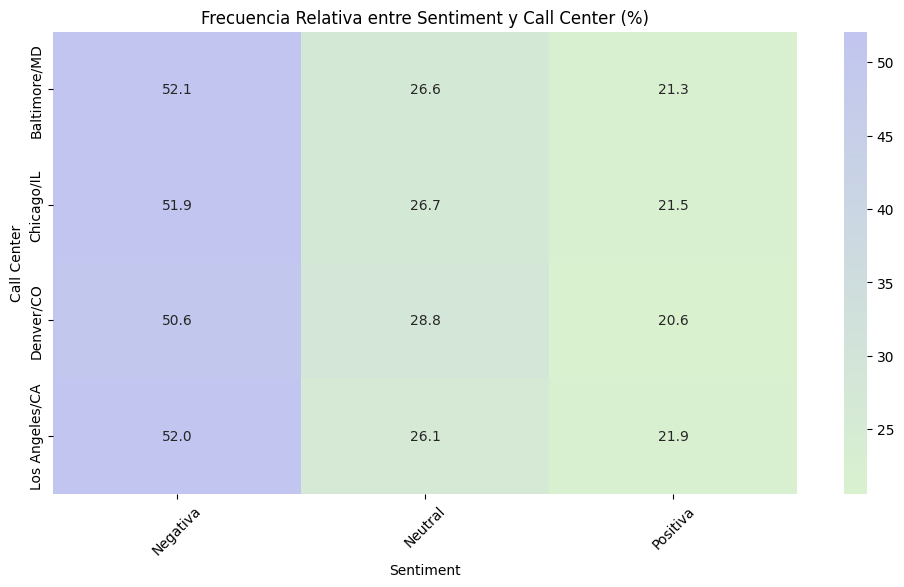

In [14]:
sentiment_call_center_absolute = pd.crosstab(df["call_center"], df["general_sentiment"])
sentiment_call_center_relative = pd.crosstab(df["call_center"], df["general_sentiment"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
sentiment_call_center_absolute[sentiment_order].plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(sentiment_order)])
plt.title("Frecuencia Absoluta entre Sentiment y Call Center")
plt.xlabel("Call Center")
plt.ylabel("Frecuencia Absoluta")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_call_center_relative[sentiment_order], annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Sentiment y Call Center (%)")
plt.xlabel("Sentiment")
plt.ylabel("Call Center")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de "Los Angeles/CA" tienen mayor proporción de valoraciones positivas, mientras que "Baltimore/MD" muestra una mayor proporción de negativos.

Nos puede dar una idea de que los agentes de "Los Angeles/CA" estén mejor entrenados y tengan mejor conocimiento, ya que a pesar de tener más volumen de contactos,

mantienen una mejor satisfacción de los clientes.


### "reason" vs. "channel"

<Figure size 1200x600 with 0 Axes>

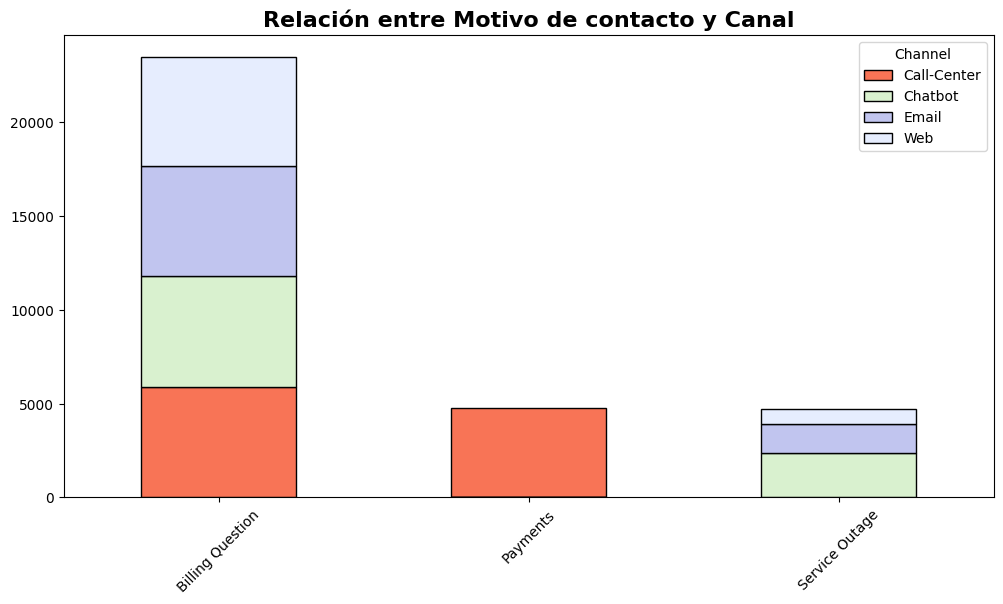

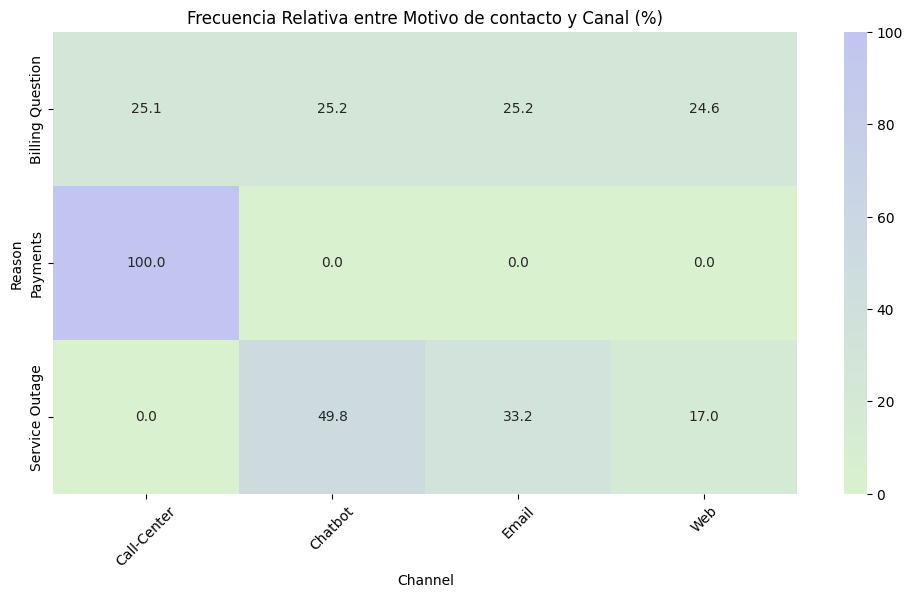

In [15]:
reason_channel_absolute = pd.crosstab(df["reason"], df["channel"])
reason_channel_relative = pd.crosstab(df["reason"], df["channel"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_channel_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_channel_absolute.columns)], edgecolor="black")
plt.title("Relación entre Motivo de contacto y Canal", weight="bold",fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1, 1), loc="upper right")

plt.savefig("relación_canal_razon.png", dpi=300, bbox_inches="tight")  # Guarda la gráfica como PNG

plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_channel_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Motivo de contacto y Canal (%)")
plt.xlabel("Channel")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

Podemos ver que todos los contactos relacionados con pagos se hacen a traves de llamadas.


Por otro lado los de interrupción de servicio poro todos los canales menos el de llamadas.

### "reason" vs. "call_center"

<Figure size 1200x600 with 0 Axes>

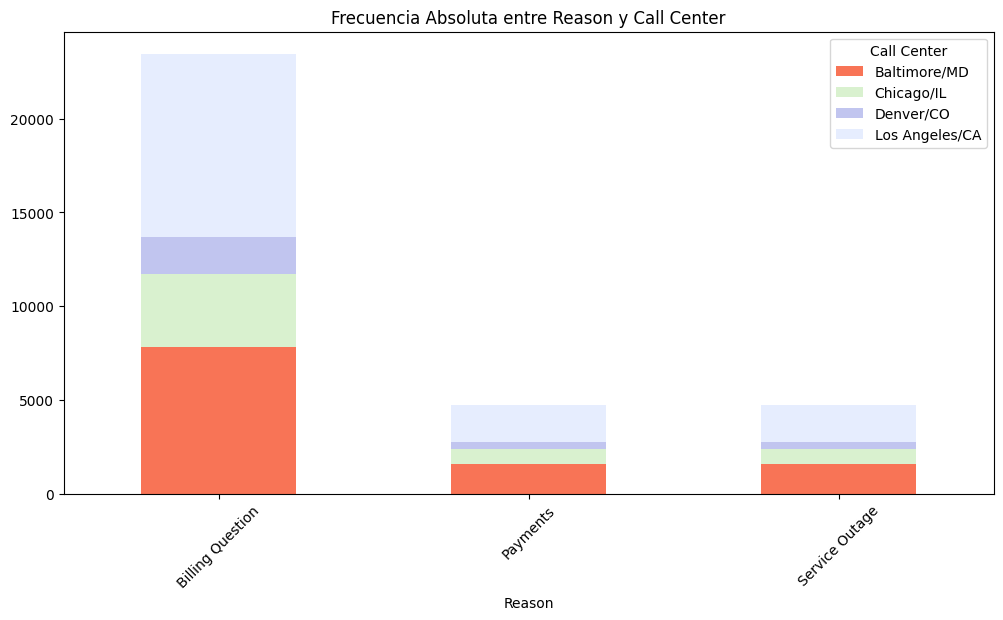

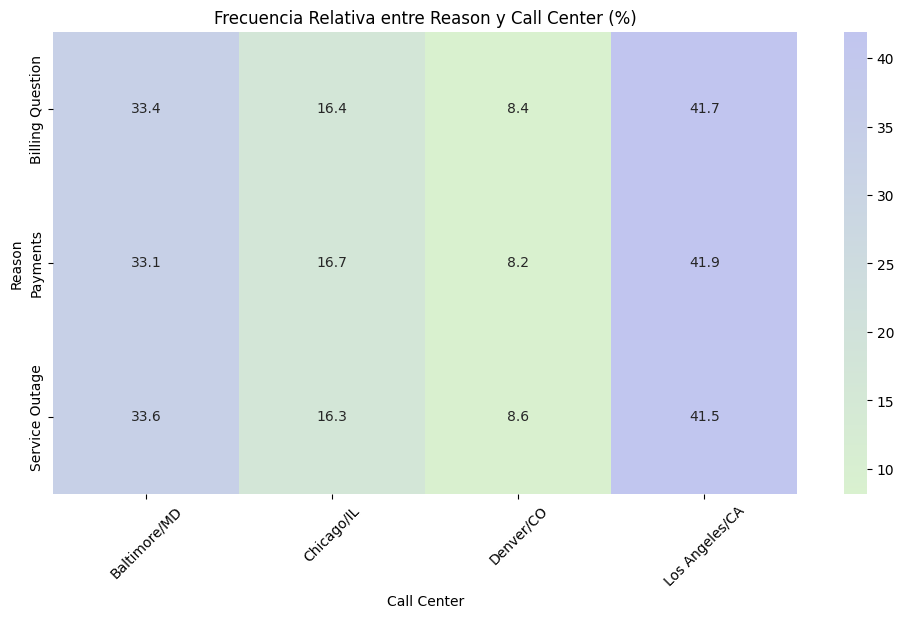

In [16]:
reason_call_center_absolute = pd.crosstab(df["reason"], df["call_center"])
reason_call_center_relative = pd.crosstab(df["reason"], df["call_center"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
reason_call_center_absolute.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors[:len(reason_call_center_absolute.columns)])
plt.title("Frecuencia Absoluta entre Reason y Call Center")
plt.xlabel("Reason")
plt.xticks(rotation=45)
plt.legend(title="Call Center", bbox_to_anchor=(1, 1), loc="upper right")
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(reason_call_center_relative, annot=True, fmt=".1f", cmap=custom_cmap, cbar=True)
plt.title("Frecuencia Relativa entre Reason y Call Center (%)")
plt.xlabel("Call Center")
plt.ylabel("Reason")
plt.xticks(rotation=45)
plt.show()

#### Conclusión

El centro de los Angeles tiene mayor representación de contactos respecto a los otros.

### "sentiment" vs. "call_center"

<Figure size 1000x600 with 0 Axes>

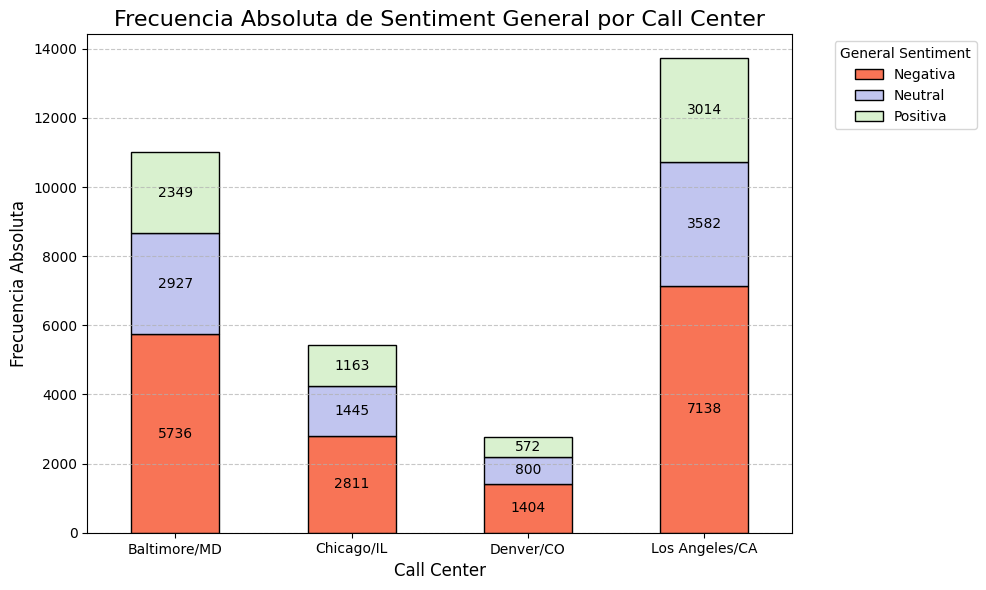

<Figure size 1000x600 with 0 Axes>

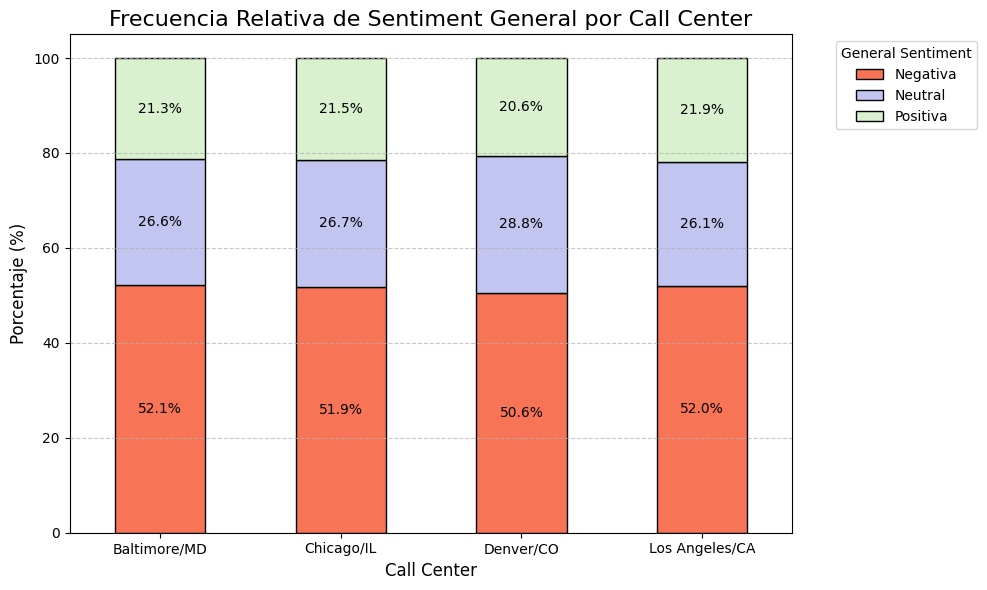

In [20]:
# Calcular las frecuencias absolutas por Call Center y Sentiment General
absolute_data = pd.crosstab(df["call_center"], df["general_sentiment"])

# Calcular las frecuencias relativas por Call Center y Sentiment General
relative_data = pd.crosstab(df["call_center"], df["general_sentiment"], normalize="index") * 100

# Ordenar las columnas para mantener la lógica de los sentimientos
absolute_data = absolute_data[["Negativa", "Neutral", "Positiva"]]
relative_data = relative_data[["Negativa", "Neutral", "Positiva"]]

# Función para añadir números en las barras
def add_bar_labels(ax, data):
    for p in ax.patches:
        value = p.get_height()
        if value > 0:  # Mostrar solo valores mayores a 0
            ax.annotate(
                f"{value:.0f}" if data.equals(absolute_data) else f"{value:.1f}%",  # Mostrar porcentaje o entero
                (p.get_x() + p.get_width() / 2., p.get_y() + value / 2),
                ha="center", va="center", fontsize=10, color="black"
            )

# Gráfico de barras apiladas (Frecuencia Absoluta)
plt.figure(figsize=(10, 6))
ax_abs = absolute_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf"],
    edgecolor="black"
)
add_bar_labels(ax_abs, absolute_data)
plt.title("Frecuencia Absoluta de Sentiment General por Call Center", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Frecuencia Absoluta", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="General Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas (Frecuencia Relativa)
plt.figure(figsize=(10, 6))
ax_rel = relative_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf"],
    edgecolor="black"
)
add_bar_labels(ax_rel, relative_data)
plt.title("Frecuencia Relativa de Sentiment General por Call Center", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="General Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();


#### Conclusión

A pesar de recibir el mayor número de sentiment negativo, el call center de Los Angeles, se mantiene con el mejor porcentaje de sentiment positivo.
Lo cual indica, que a pesar del volumen de contactos, mantienen un buen servicio comparado con el resto, especialmente con el de Baltimore que obtiene los peores resultados.

#### "call_center" vs. "channel"

<Figure size 1200x600 with 0 Axes>

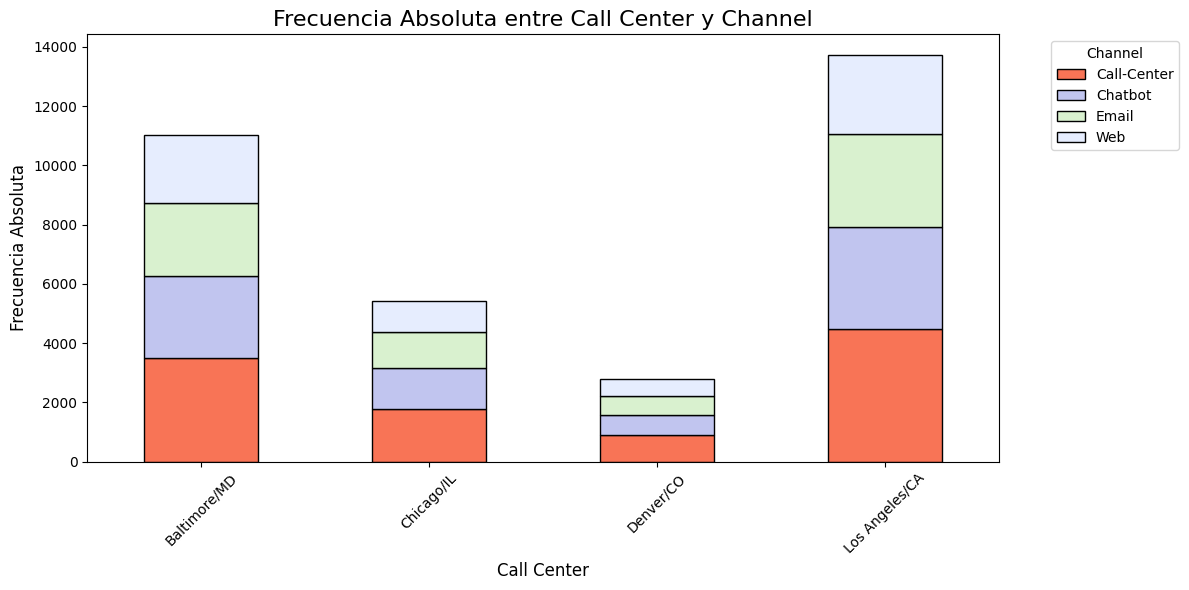

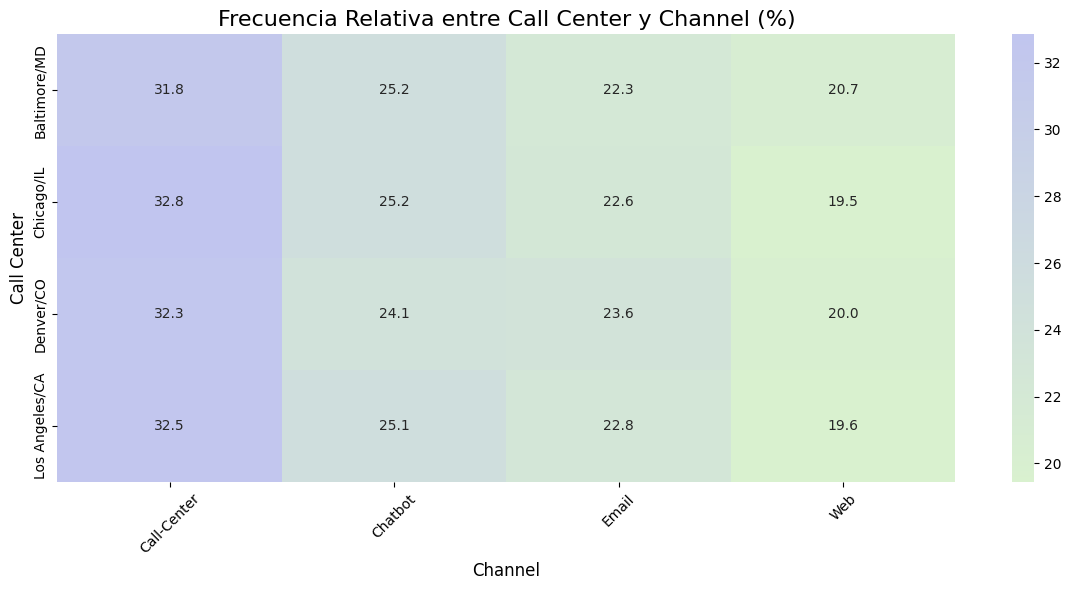

In [18]:
call_center_channel_absolute = pd.crosstab(df["call_center"], df["channel"])
call_center_channel_relative = pd.crosstab(df["call_center"], df["channel"], normalize="index") * 100

# Gráfico de frecuencias absolutas
plt.figure(figsize=(12, 6))
call_center_channel_absolute.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["#f87456", "#c1c5ef", "#d9f1cf", "#e6edfe"],
    edgecolor="black"
)
plt.title("Frecuencia Absoluta entre Call Center y Channel", fontsize=16)
plt.xlabel("Call Center", fontsize=12)
plt.ylabel("Frecuencia Absoluta", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Gráfico de frecuencias relativas
plt.figure(figsize=(12, 6))
sns.heatmap(
    call_center_channel_relative,
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,
    cbar=True
)
plt.title("Frecuencia Relativa entre Call Center y Channel (%)", fontsize=16)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Call Center", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ANÁLISIS MULTIVARIANTE

#### "reason", "duration" y "sentiment"

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_29894/2365026569.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


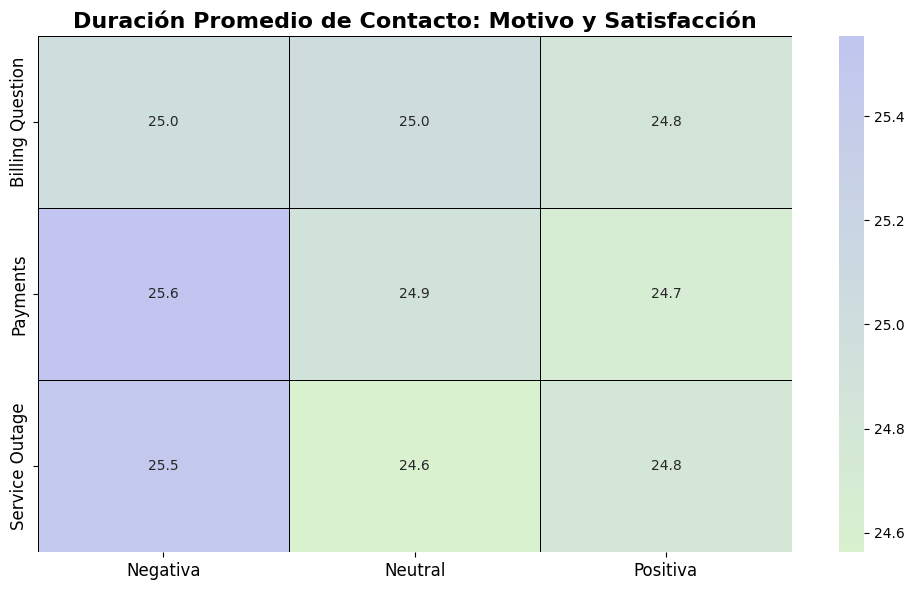

In [21]:
# Crear tabla resumen para el heatmap
heatmap_data = df.pivot_table(
    values="call duration in minutes",
    index="reason",
    columns="general_sentiment",
    aggfunc="mean"
)

# Crear la figura
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",  # Valores con un decimal
    cmap=custom_cmap,  # Colores personalizados
    cbar=True,  # Mostrar barra de color
    linewidths=0.5,  # Grosor de las líneas divisorias
    linecolor="black"  # Color de las líneas divisorias
)

# Personalización del gráfico
plt.title("Duración Promedio de Contacto: Motivo y Satisfacción", fontsize=16, fontweight="bold")
plt.xlabel("")  # Quitar el título del eje X
plt.ylabel("")  # Quitar el título del eje Y
plt.xticks(fontsize=12)  # Ajustar tamaño de las etiquetas en el eje X
plt.yticks(fontsize=12)  # Ajustar tamaño de las etiquetas en el eje Y

# Ajustar diseño
plt.tight_layout()

# Guardar la gráfica
plt.savefig("heatmap_duracion_motivo_satisfaccion.png", dpi=300, bbox_inches="tight")

# Mostrar la gráfica
plt.show()

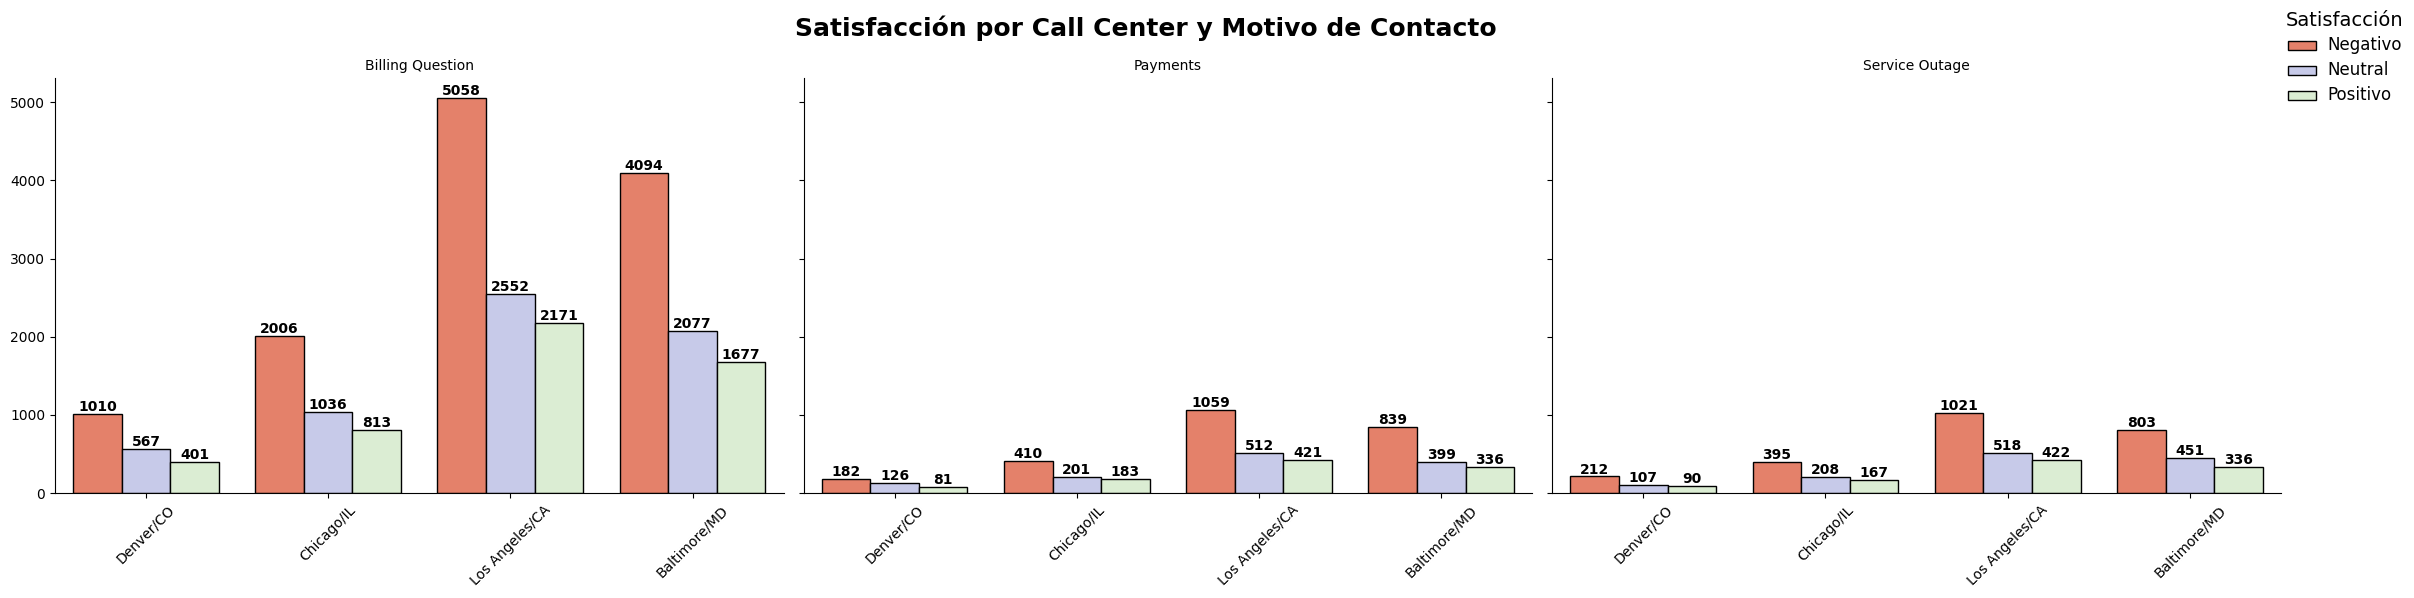

In [36]:
# Crear el catplot
g = sns.catplot(
    data=df,
    x="call_center",
    hue="general_sentiment",
    col="reason",
    kind="count",
    palette=["#f87456", "#c1c5ef", "#d9f1cf"],
    height=6,
    aspect=1.2,
    edgecolor="black"
)

# Añadir números encima de las barras
for ax in g.axes.flat:  # Recorre cada gráfico
    for p in ax.patches:  # Recorre cada barra
        height = p.get_height()  # Altura de la barra (frecuencia)
        if height > 0:  # Añadir solo si hay datos
            ax.text(
                p.get_x() + p.get_width() / 2,  # Posición X
                height + 0.5,  # Posición Y ligeramente por encima
                f"{int(height)}",  # Texto (frecuencia absoluta)
                ha="center", va="bottom", fontsize=10, fontweight="bold"
            )

# Ajuste de títulos y etiquetas
g.set_titles("{col_name}")
g.set_axis_labels("", "")
g.set_xticklabels(rotation=45)

# Título único para el eje X en el centro
plt.subplots_adjust(bottom=0.15) 
plt.figtext(0.5, -0.04, "", ha="center", fontsize=16, fontweight="bold")

# Título para el gráfico
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.suptitle("Satisfacción por Call Center y Motivo de Contacto", fontsize=18, fontweight="bold")

# Leyenda
g._legend.set_title("Satisfacción")
g._legend.set_bbox_to_anchor((1.05, 1))
g._legend.set_loc("upper right")
for text in g._legend.texts:
    text.set_fontsize(12)  
g._legend.get_title().set_fontsize(14) 

plt.tight_layout()

# Guardar el gráfico
plt.savefig("relacion_callcenter_razon_satisfaccion.png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()


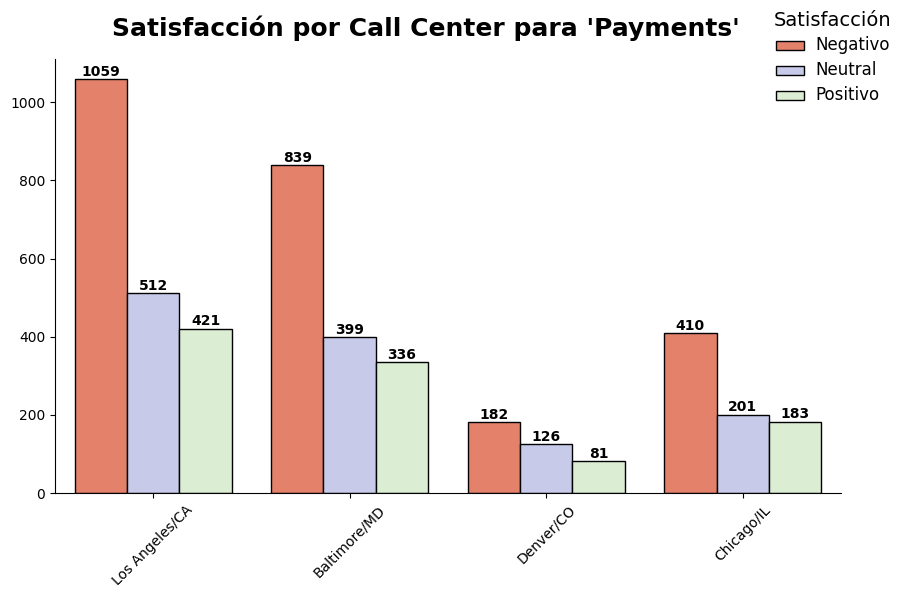

In [37]:
# Filtrar el DataFrame para solo "Payments"
df_payments = df[df["reason"] == "Payments"]

# Crear el catplot solo con "Payments"
g = sns.catplot(
    data=df_payments,
    x="call_center",
    hue="general_sentiment",
    kind="count",
    palette=["#f87456", "#c1c5ef", "#d9f1cf"],
    height=6,
    aspect=1.2,
    edgecolor="black"
)

# Añadir números encima de las barras
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Añadir solo si hay datos
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 0.5,
                f"{int(height)}",
                ha="center", va="bottom", fontsize=10, fontweight="bold"
            )

# Ajuste de títulos y etiquetas
g.set_axis_labels("", "")
g.set_xticklabels(rotation=45)

# Título general
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.suptitle("Satisfacción por Call Center para 'Payments'", fontsize=18, fontweight="bold")

# Leyenda
g._legend.set_title("Satisfacción")
g._legend.set_bbox_to_anchor((1.05, 1))
g._legend.set_loc("upper right")
for text in g._legend.texts:
    text.set_fontsize(12)
g._legend.get_title().set_fontsize(14)

plt.tight_layout()

# Guardar el gráfico
plt.savefig("payments_callcenter_satisfaccion.png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()


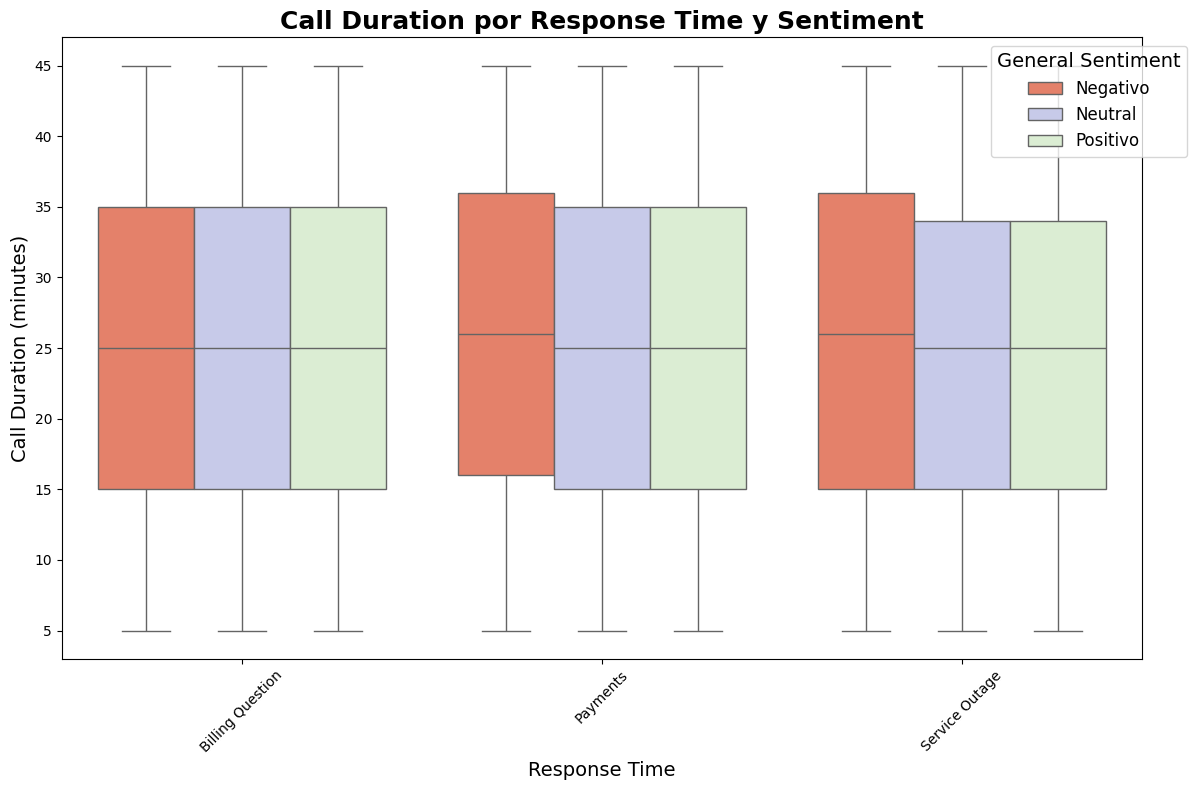

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="reason",
    y="call duration in minutes",
    hue="general_sentiment",
    data=df,
    palette=["#f87456", "#c1c5ef", "#d9f1cf"]
)

# Títulos y etiquetas
plt.title("Call Duration por Response Time y Sentiment", fontsize=18, fontweight="bold")
plt.xlabel("Response Time", fontsize=14)
plt.ylabel("Call Duration (minutes)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="General Sentiment", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc="upper right")
plt.tight_layout()
plt.show()

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_28388/205709765.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


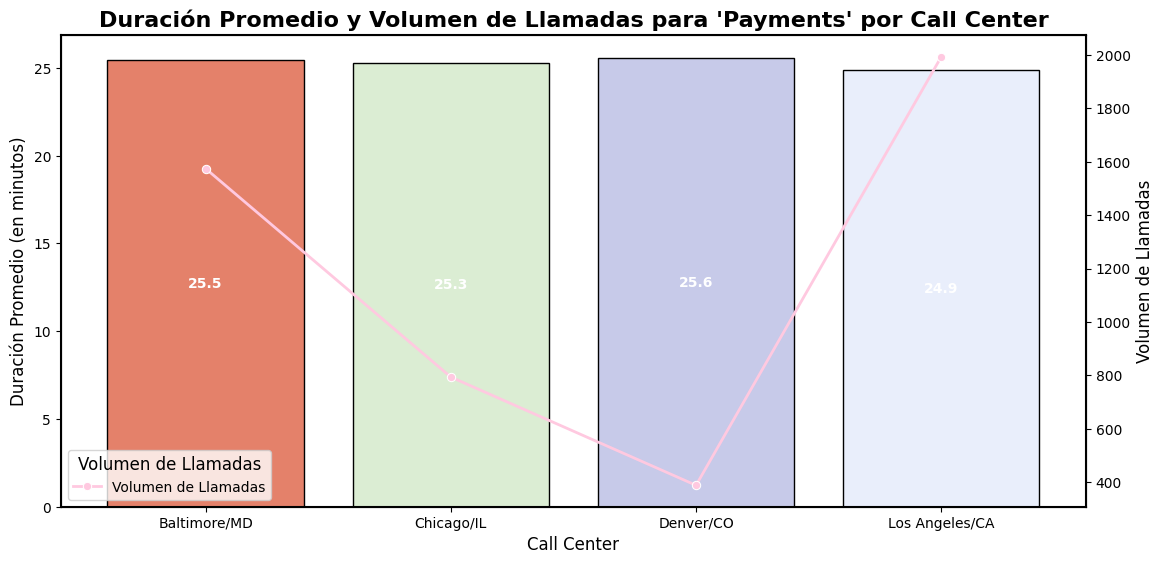

In [54]:
# Filtrar los datos solo para "Payments"
payments_data = df[df["reason"] == "Payments"]

# Calcular la duración promedio y el volumen de llamadas por Call Center
payments_summary = payments_data.groupby("call_center").agg({
    "call duration in minutes": "mean",  # Duración promedio
    "call_center": "size"  # Volumen de llamadas
}).rename(columns={"call duration in minutes": "mean_duration", "call_center": "volume"}).reset_index()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras: Duración promedio
bars = sns.barplot(
    data=payments_summary,
    x="call_center",
    y="mean_duration",
    palette=["#f87456", "#d9f1cf", "#c1c5ef", "#e6edfe"],
    edgecolor="black",
    ax=ax1
)
ax1.set_ylabel("Duración Promedio (en minutos)", fontsize=12, color="black")
ax1.set_xlabel("Call Center", fontsize=12)
ax1.tick_params(axis="y", labelcolor="black", labelsize=10)

# Añadir valores DENTRO de las barras
for bar, value in zip(bars.patches, payments_summary["mean_duration"]):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,  # Colocar en el medio de la barra
        f"{value:.1f}",  # Valor con 1 decimal
        ha="center",
        va="center",
        color="white",
        fontsize=10,
        fontweight="bold"
    )

# Gráfico de líneas: Volumen de llamadas (eje secundario)
ax2 = ax1.twinx()
sns.lineplot(
    data=payments_summary,
    x="call_center",
    y="volume",
    color="#ffc9e0",  # Línea rosa
    marker="o",
    linewidth=2,
    label="Volumen de Llamadas",
    ax=ax2
)
ax2.set_ylabel("Volumen de Llamadas", fontsize=12, color="black")
ax2.tick_params(axis="y", labelcolor="black", labelsize=10)

# Título del gráfico
plt.title("Duración Promedio y Volumen de Llamadas para 'Payments' por Call Center", fontsize=16, fontweight="bold")

# Leyenda del gráfico de líneas en la esquina inferior izquierda
ax2.legend(
    loc="lower left",
    fontsize=10,
    title="Volumen de Llamadas",
    title_fontsize=12
)

# Añadir un marco a la gráfica
for spine in plt.gca().spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(1.5)

# Ajustar diseño
plt.tight_layout(pad=2.0)

# Guardar la gráfica
plt.savefig("duracion_volumen_payments_callcenter.png", dpi=300, bbox_inches="tight")

# Mostrar la gráfica
plt.show()


Frecuencia Relativa (%) de Sentiment en el Canal Call-Center por Call Center:
general_sentiment   Negativa    Neutral   Positiva
call_center                                       
Baltimore/MD       52.699229  26.163953  21.136818
Chicago/IL         50.955056  26.404494  22.640449
Denver/CO          49.109131  30.289532  20.601336
Los Angeles/CA     52.914798  25.269058  21.816143

Frecuencia Absoluta de Sentiment en el Canal Call-Center por Call Center:
general_sentiment  Negativa  Neutral  Positiva
call_center                                   
Baltimore/MD           1845      916       740
Chicago/IL              907      470       403
Denver/CO               441      272       185
Los Angeles/CA         2360     1127       973


<Figure size 1400x700 with 0 Axes>

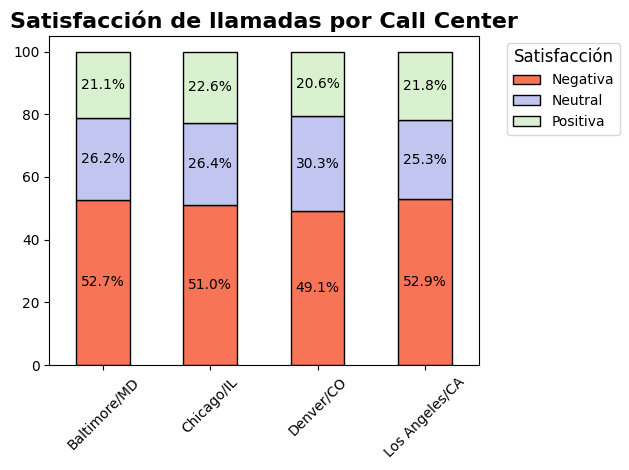

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar los datos solo para el canal "Call-Center"
call_center_channel = df[df["channel"] == "Call-Center"]

# Agrupar por Call Center y Sentiment
sentiment_callcenter_channel = pd.crosstab(
    call_center_channel["call_center"],
    call_center_channel["general_sentiment"],
    normalize="index"
) * 100

sentiment_callcenter_channel_absolute = pd.crosstab(
    call_center_channel["call_center"],
    call_center_channel["general_sentiment"]
)

# Mostrar las tablas
print("Frecuencia Relativa (%) de Sentiment en el Canal Call-Center por Call Center:")
print(sentiment_callcenter_channel)

print("\nFrecuencia Absoluta de Sentiment en el Canal Call-Center por Call Center:")
print(sentiment_callcenter_channel_absolute)

# Gráfico de barras apiladas
plt.figure(figsize=(14, 7))
sentiment_callcenter_channel.plot(
    kind="bar",
    stacked=True,
    color=["#f87456", "#c1c5ef", "#d9f1cf"],  # Colores personalizados
    edgecolor="black"
)
plt.title("Satisfacción de llamadas por Call Center", fontsize=16, fontweight="bold")
plt.xlabel("", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=45)

# Añadir etiquetas de porcentaje encima de cada segmento
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Evitar etiquetas en segmentos vacíos
            plt.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f"{height:.1f}%", 
                ha="center", 
                va="center", 
                fontsize=10, 
                color="black",
            )

# Ajustar leyenda
plt.legend(title="Satisfacción", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10, title_fontsize=12)

# Guardar la gráfica
plt.tight_layout()
plt.savefig("sentiment_callcenter_channel_analysis.png", dpi=300, bbox_inches="tight")

# Mostrar la gráfica
plt.show()
